In [1]:
import tensorflow as tf
import math

In [126]:
import os

In [110]:
import utils

In [6]:
data = np.random.rand(5,3)

In [15]:
np_norms = np.linalg.norm(data,axis=0)

In [17]:
np_norms

array([ 1.13334822,  1.37877002,  1.0132657 ])

In [16]:
np.square(np_norms)

array([ 1.28447819,  1.90100676,  1.02670739])

In [7]:
emb = tf.Variable(data)

In [21]:
normed = tf.norm(emb, axis=0)
squared_norm = tf.square(normed)
mul_test = tf.mu

In [90]:
def conditional_assignment(tensor, epsilon):
    norms = tf.norm(tensor, axis=1)
    comparison = tf.greater(norms, tf.constant(1.0, dtype=tf.float64))
    norm = tf.nn.l2_normalize(tensor, dim=1) - epsilon
    conditional_assignment_op = tensor.assign( tf.where (comparison, norm, tensor) )
    return conditional_assignment_op

In [91]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [92]:
sess.run([emb, tf.norm(emb, axis=1)])

[array([[ 0.03623995,  0.44508567,  0.02048884],
        [ 0.4602401 ,  0.39136815,  0.36021053],
        [ 0.15474701,  0.93211269,  0.61143239],
        [ 0.77896091,  0.16941624,  0.62904565],
        [ 0.66379   ,  0.80758934,  0.35635371]]),
 array([ 0.44702838,  0.70337871,  1.1254467 ,  1.01547053,  1.10444814])]

In [94]:
sess.run([tf.clip_by_norm(emb, 1-0.00001, axes=1)])

[array([[ 0.03623995,  0.44508567,  0.02048884],
        [ 0.4602401 ,  0.39136815,  0.36021053],
        [ 0.13749692,  0.82820748,  0.5432743 ],
        [ 0.7670859 ,  0.16683354,  0.61945605],
        [ 0.60100908,  0.73120796,  0.32264996]])]

In [89]:
# sess.run([squared_norm, emb])
sess.run([conditional_assignment(emb, 0.00001)])

[array([[ 0.03623995,  0.44508567,  0.02048884],
        [ 0.4602401 ,  0.39136815,  0.36021053],
        [ 0.1374883 ,  0.82820576,  0.54326974],
        [ 0.76708357,  0.16682521,  0.61945224],
        [ 0.60100509,  0.73120527,  0.32264319]])]

In [83]:
sess.run([tf.greater(tf.norm(emb, axis=1), tf.constant(1.0, dtype=tf.float64))])

[array([False, False, False, False, False], dtype=bool)]

In [84]:
sess.run([tf.norm(emb, axis=1)])

[array([ 0.44702838,  0.70337871,  0.99998491,  0.99998447,  0.99998345])]

In [85]:
sess.run([emb])

[array([[ 0.03623995,  0.44508567,  0.02048884],
        [ 0.4602401 ,  0.39136815,  0.36021053],
        [ 0.1374883 ,  0.82820576,  0.54326974],
        [ 0.76708357,  0.16682521,  0.61945224],
        [ 0.60100509,  0.73120527,  0.32264319]])]

In [65]:
sess.run([conditional_assignment(emb)])

[array([[ 0.03623995,  0.44508567,  0.02048884],
        [ 0.4602401 ,  0.39136815,  0.36021053],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]])]

In [97]:
ls

ProductViewEmbeddingExploration.ipynb   plot line graphs with errors.ipynb
ProductViewer.ipynb                     polar embedding.ipynb
Untitled.ipynb                          read gml file.ipynb
cartesian_hyperbolic.ipynb              read gml.ipynb
euclidean_embedding_forward_pass.ipynb  tf_grad_intercept.ipynb
hyp_embedding_forward_pass.ipynb        tf_logs/
hyperbolic_embedding.ipynb              theta_grad_debug.ipynb


In [98]:
cd ../../results/

/Users/workspace/Hyperbolic-Embedding/results


In [99]:
ls

README.md               blogcatalog_121_sample/ polbooks/
adjnoun/                flickr/                 political_blogs/
all/                    football/               youtube/
blogcatalog/            karate/


In [100]:
cd all

/Users/workspace/Hyperbolic-Embedding/results/all


In [101]:
ls

adjnoun_errors.csv          karate_means.csv
adjnoun_means.csv           lineplots/
embedding_figs/             polbooks_errors.csv
football_errors.csv         polbooks_means.csv
football_means.csv          political_blogs_errors.csv
karate_errors.csv           political_blogs_means.csv


In [102]:
cd ..

/Users/workspace/Hyperbolic-Embedding/results


In [103]:
ls

README.md               blogcatalog_121_sample/ polbooks/
adjnoun/                flickr/                 political_blogs/
all/                    football/               youtube/
blogcatalog/            karate/


In [104]:
cd football/

/Users/workspace/Hyperbolic-Embedding/results/football


In [105]:
ls

figs/                       micro20170518-093531.csv
macro20170518-082608.csv    micro20170518-102429.csv
macro20170518-093133.csv    micro20170518-102728.csv
macro20170518-093531.csv    pvalues20170518-082608.csv
macro20170518-102429.csv    pvalues20170518-093133.csv
macro20170518-102728.csv    pvalues20170518-093531.csv
micro20170518-082608.csv    pvalues20170518-102429.csv
micro20170518-093133.csv    pvalues20170518-102728.csv


In [111]:
cd ../../local_resources/football/

/Users/workspace/Hyperbolic-Embedding/local_resources/football


In [112]:
ls

X.p               football.txt      football32.emd    walks_n1_l10.csv
deepwalk_figs/    football128.emd   football4.emd     y.p
embeddings/       football16.emd    football64.emd
football.gml      football2.emd     football8.emd


In [114]:
y = utils.read_pickle('y.p')

In [124]:
y.tail(50)

,cat
65,9
66,4
67,11
68,8
69,10
70,9
71,6
72,3
73,11
74,3


In [117]:
path = 'football2.emd'

In [118]:
de = pd.read_csv(path, header=None, index_col=0, skiprows=1, sep=" ")

In [119]:
de.head()

,1,2
0,,
7,0.163730,-0.294363
62,0.175629,-0.230399
21,-0.282195,-0.154486
64,0.004095,-0.148719
17,-0.085513,-0.401220


In [120]:
de.sort_index(inplace=True)

In [123]:
de.tail(50)

,1,2
0,,
65,-0.260192,-0.319107
66,0.094310,-0.490185
67,-0.140702,-0.156527
68,-0.279966,-0.116826
69,-0.129916,-0.269242
70,0.179014,-0.486941
71,0.187840,-0.230134
72,0.014289,-0.464155
73,-0.225496,-0.147748


In [133]:
folder = '../../local_resources/karate/gridsearch/'
files = os.listdir(folder)

In [135]:
ls

X.p               football.txt      football32.emd    walks_n1_l10.csv
deepwalk_figs/    football128.emd   football4.emd     y.p
embeddings/       football16.emd    football64.emd
football.gml      football2.emd     football8.emd


In [136]:
cd ../../results/all/

/Users/workspace/Hyperbolic-Embedding/results/all


In [137]:
ls

adjnoun_errors.csv
adjnoun_errors_20170822-183858.csv
adjnoun_means.csv
adjnoun_means_20170822-183858.csv
embedding_figs/
football_errors.csv
football_errors_20170822-183653.csv
football_errors_20170822-190137.csv
football_errors_20170822-191038.csv
football_means.csv
football_means_20170822-183653.csv
football_means_20170822-190137.csv
football_means_20170822-191038.csv
karate_errors.csv
karate_errors_20170822-184418.csv
karate_means.csv
karate_means_20170822-184418.csv
lineplots/
polbooks_errors.csv
polbooks_errors_20170822-184018.csv
polbooks_means.csv
polbooks_means_20170822-184018.csv
political_blogs_errors.csv
political_blogs_errors_20170822-184253.csv
political_blogs_means.csv
political_blogs_means_20170822-184253.csv


In [138]:
ls

adjnoun_errors.csv
adjnoun_errors_20170822-183858.csv
adjnoun_errors_20170822-192942.csv
adjnoun_means.csv
adjnoun_means_20170822-183858.csv
adjnoun_means_20170822-192942.csv
embedding_figs/
football_errors.csv
football_errors_20170822-183653.csv
football_errors_20170822-190137.csv
football_errors_20170822-191038.csv
football_errors_20170822-192740.csv
football_means.csv
football_means_20170822-183653.csv
football_means_20170822-190137.csv
football_means_20170822-191038.csv
football_means_20170822-192740.csv
karate_errors.csv
karate_errors_20170822-184418.csv
karate_means.csv
karate_means_20170822-184418.csv
lineplots/
polbooks_errors.csv
polbooks_errors_20170822-184018.csv
polbooks_errors_20170822-193059.csv
polbooks_means.csv
polbooks_means_20170822-184018.csv
polbooks_means_20170822-193059.csv
political_blogs_errors.csv
political_blogs_errors_20170822-184253.csv
political_blogs_means.csv
political_blogs_means_20170822-184253.csv


In [158]:
errors = pd.read_csv('polbooks_errors_20170822-193059.csv', index_col=0)
means = pd.read_csv('polbooks_means_20170822-193059.csv', index_col=0)

In [159]:
errors.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
hyperbolic,0.083078,0.071281,0.012466,0.013667,0.009439,0.018068,0.008982,0.022820,0.059646
deepwalk2,0.025519,0.026306,0.019471,0.016048,0.012753,0.020997,0.010103,0.024272,0.028868
deepwalk4,0.022474,0.019310,0.017506,0.008081,0.012870,0.019444,0.016414,0.024024,0.033063
deepwalk8,0.025513,0.018327,0.008701,0.004616,0.006816,0.018198,0.008640,0.023427,0.024412
deepwalk16,0.021725,0.018189,0.015251,0.004616,0.006816,0.013183,0.008510,0.022940,0.024412


In [160]:
means.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
hyperbolic,0.387580,0.513383,0.619729,0.618584,0.606418,0.624964,0.581178,0.627997,0.651240
deepwalk2,0.206336,0.206572,0.249073,0.223140,0.210243,0.291252,0.261114,0.261059,0.208125
deepwalk4,0.197952,0.186188,0.219883,0.202962,0.199773,0.251232,0.229311,0.223024,0.218504
deepwalk8,0.202959,0.183264,0.202172,0.196066,0.191944,0.236796,0.205769,0.210933,0.215705
deepwalk16,0.194424,0.183030,0.209734,0.196066,0.191944,0.214735,0.188879,0.208261,0.215705


In [161]:
errors_t = errors.transpose()

In [162]:
errors_t.head()

,hyperbolic,deepwalk2,deepwalk4,deepwalk8,deepwalk16,deepwalk32,deepwalk64,deepwalk128
0.1,0.083078,0.025519,0.022474,0.025513,0.021725,0.022036,0.027121,0.024870
0.2,0.071281,0.026306,0.019310,0.018327,0.018189,0.020381,0.020523,0.021212
0.3,0.012466,0.019471,0.017506,0.008701,0.015251,0.015307,0.013458,0.016136
0.4,0.013667,0.016048,0.008081,0.004616,0.004616,0.004616,0.004616,0.004616
0.5,0.009439,0.012753,0.012870,0.006816,0.006816,0.006816,0.006816,0.006816


In [163]:
means_t = means.transpose()

In [164]:
means_t.head()

,hyperbolic,deepwalk2,deepwalk4,deepwalk8,deepwalk16,deepwalk32,deepwalk64,deepwalk128
0.1,0.387580,0.206336,0.197952,0.202959,0.194424,0.194253,0.203669,0.201008
0.2,0.513383,0.206572,0.186188,0.183264,0.183030,0.186428,0.186633,0.187602
0.3,0.619729,0.249073,0.219883,0.202172,0.209734,0.209795,0.207781,0.210683
0.4,0.618584,0.223140,0.202962,0.196066,0.196066,0.196066,0.196066,0.196066
0.5,0.606418,0.210243,0.199773,0.191944,0.191944,0.191944,0.191944,0.191944


In [165]:
%matplotlib inline

In [166]:
def plot_error_bars(ax, data, sde):
    xvals = np.arange(0, 9, 1)
    for idx in range(data.shape[1]):
        if idx == 0:
            col = 'b'
        else:
            col = 'r'
        ax.fill_between(xvals.T, data[:, idx] - sde[:, idx], data[:, idx] + sde[:, idx], interpolate=True, alpha=0.1,
                        color=col)
    return ax

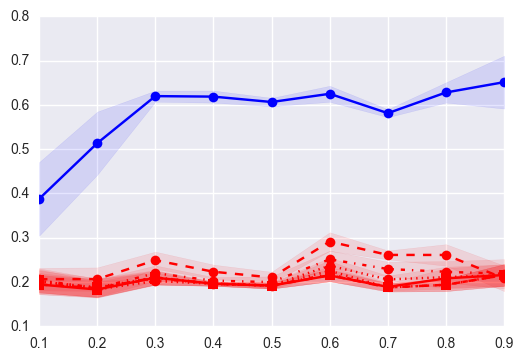

In [167]:
styles = ['bo-', 'ro--', 'ro-.', 'ro:', 'rs-', 'rs--', 'rs-.', 'rs:']
ax = means_t.plot(style=styles, legend=False, kind='line')
ax = plot_error_bars(ax, means_t.values, errors_t.values)

In [169]:
cd ../../local_resources/karate/

/Users/workspace/Hyperbolic-Embedding/local_resources/karate


In [217]:
x, y = utils.read_data('X.p', 'y.p', threshold=0)

input matrix of shape: (34, 34)
output matrix of shape: (34, 34)
(34, 34)


In [218]:
type(x)

scipy.sparse.csc.csc_matrix

In [219]:
len(y.shape)

1

In [220]:
len(x.shape)

2

In [230]:
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.2, stratify=y)

In [256]:
x = np.array([.3,0])
y = np.array([[.3,.4], [.3,.2]])

In [263]:
xvec = np.array([[.3,0], [.3,0.1], [.2,.1]])

In [274]:
temp = xvec - y

ValueError: operands could not be broadcast together with shapes (3,2) (2,2) 

In [271]:
temp.shape

(2, 3, 2)

In [268]:
temp.reshape([3,2])

ValueError: cannot reshape array of size 12 into shape (3,2)

In [259]:
norm_square = np.square(np.linalg.norm(y-x, axis=1))

In [260]:
denom1 = 1-np.square(np.linalg.norm(y, axis=1))
denom2 = 1-np.square(np.linalg.norm(x, axis=0))

In [261]:
arg = 1 + 2*norm_square/(denom1*denom2)

In [262]:
np.arccosh(arg)

array([ 0.93403847,  0.44584975])

In [ ]:
norm_squared = tf.square(tf.norm(vecs, axis=0))
hyperbolic_factor = 0.25 * tf.square(1 - norm_squared)

In [239]:
np.sqrt(13)

3.6055512754639891

In [293]:
x = np.array([[2,0],[3,0],[4,0]])
y = np.array([[1,0],[2,4]])

In [303]:
xnorm_sq = np.square(np.linalg.norm(x, axis=1))

In [305]:
xnorm_sq

array([  4.,   9.,  16.])

In [308]:
ynorm_sq = np.square(np.linalg.norm(y, axis=1))

In [309]:
ynorm_sq

array([  1.,  20.])

In [310]:
xnorm_sq[:,None] + ynorm_sq[None,:]

array([[  5.,  24.],
       [ 10.,  29.],
       [ 17.,  36.]])

In [311]:
(1-xnorm_sq[:,None])

array([[ -3.],
       [ -8.],
       [-15.]])

In [313]:
1-ynorm_sq[None,:]

array([[  0., -19.]])

In [312]:
(1-xnorm_sq[:,None])*(1-ynorm_sq[None,:])

array([[  -0.,   57.],
       [  -0.,  152.],
       [  -0.,  285.]])

In [298]:
np.matmul(x,y.T)

array([[2, 4],
       [3, 6],
       [4, 8]])

In [302]:
np.square(xnorm[:,None]) + np.square(ynorm[None,:]) - 2*np.matmul(x,y.T)

array([[  1.,  16.],
       [  4.,  17.],
       [  9.,  20.]])

In [ ]:
denom